In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, and_, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# view contents of Station by converting to dataframe
station_qry = session.query(Station)
station_df = pd.read_sql(station_qry.statement, station_qry.session.bind)
station_df

id      station                                    name  latitude  \
0   1  USC00519397                    WAIKIKI 717.2, HI US  21.27160   
1   2  USC00513117                    KANEOHE 838.1, HI US  21.42340   
2   3  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130   
3   4  USC00517948                       PEARL CITY, HI US  21.39340   
4   5  USC00518838              UPPER WAHIAWA 874.3, HI US  21.49920   
5   6  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US  21.33556   
6   7  USC00519281                     WAIHEE 837.5, HI US  21.45167   
7   8  USC00511918       HONOLULU OBSERVATORY 702.2, HI US  21.31520   
8   9  USC00516128            MANOA LYON ARBO 785.2, HI US  21.33310   

   longitude  elevation  
0 -157.81680        3.0  
1 -157.80150       14.6  
2 -157.83740        7.0  
3 -157.97510       11.9  
4 -158.01110      306.6  
5 -157.71139       19.5  
6 -157.84889       32.9  
7 -157.99920        0.9  
8 -157.80250      152.4

In [11]:
# view contents of Measurement by converting to dataframe
measure_qry = session.query(Measurement)
measure_df = pd.read_sql(measure_qry.statement, measure_qry.session.bind)
measure_df

id      station        date  prcp  tobs
0          1  USC00519397  2010-01-01  0.08  65.0
1          2  USC00519397  2010-01-02  0.00  63.0
2          3  USC00519397  2010-01-03  0.00  74.0
3          4  USC00519397  2010-01-04  0.00  76.0
4          5  USC00519397  2010-01-06   NaN  73.0
...      ...          ...         ...   ...   ...
19545  19546  USC00516128  2017-08-19  0.09  71.0
19546  19547  USC00516128  2017-08-20   NaN  78.0
19547  19548  USC00516128  2017-08-21  0.56  76.0
19548  19549  USC00516128  2017-08-22  0.50  76.0
19549  19550  USC00516128  2017-08-23  0.45  76.0

[19550 rows x 5 columns]

# Exploratory Climate Analysis

In [12]:
for row in session.query(Measurement.date, Measurement.prcp).all():
    print(row)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

('2015-06-04', 0.0)
('2015-06-05', 0.0)
('2015-06-06', 0.0)
('2015-06-07', 0.0)
('2015-06-08', 0.0)
('2015-06-09', 0.0)
('2015-06-10', 0.0)
('2015-06-11', 0.0)
('2015-06-12', 0.0)
('2015-06-13', 0.0)
('2015-06-14', 0.0)
('2015-06-15', 0.0)
('2015-06-16', 0.0)
('2015-06-17', 0.03)
('2015-06-18', 0.0)
('2015-06-19', 0.01)
('2015-06-20', 0.04)
('2015-06-21', 0.0)
('2015-06-22', 0.0)
('2015-06-23', 0.03)
('2015-06-24', 0.03)
('2015-06-25', 0.03)
('2015-06-26', 0.0)
('2015-06-27', 0.0)
('2015-06-28', 0.0)
('2015-06-29', 0.0)
('2015-06-30', 0.0)
('2015-07-01', 0.0)
('2015-07-02', 0.0)
('2015-07-03', 0.0)
('2015-07-04', 0.0)
('2015-07-05', 0.0)
('2015-07-06', 0.0)
('2015-07-07', 0.0)
('2015-07-08', 0.03)
('2015-07-09', 0.0)
('2015-07-10', 0.01)
('2015-07-11', 0.02)
('2015-07-12', 0.02)
('2015-07-13', 0.0)
('2015-07-14', 0.01)
('2015-07-15', 0.0)
('2015-07-16', 0.0)
('2015-07-17', 0.0)
('2015-07-18', 0.0)
('2015-07-19', 0.05)
('2015-07-20', 0.0)
('2015-07-21', 0.0)
('2015-07-22', 0.01)
('2015-

('2010-12-07', 0.0)
('2010-12-08', 0.0)
('2010-12-09', 0.0)
('2010-12-10', 1.95)
('2010-12-11', 0.62)
('2010-12-12', 0.15)
('2010-12-13', 0.47)
('2010-12-14', 0.0)
('2010-12-15', 0.0)
('2010-12-16', 0.0)
('2010-12-17', 0.0)
('2010-12-18', 0.0)
('2010-12-19', 3.18)
('2010-12-20', 4.94)
('2010-12-21', 0.43)
('2010-12-22', 0.01)
('2010-12-23', 0.02)
('2010-12-24', 0.0)
('2010-12-25', 2.95)
('2010-12-26', 0.99)
('2010-12-27', 0.46)
('2010-12-28', 0.63)
('2010-12-29', 0.02)
('2010-12-30', 0.11)
('2010-12-31', 0.05)
('2011-01-01', 0.42)
('2011-01-02', 0.11)
('2011-01-03', 0.01)
('2011-01-04', 0.0)
('2011-01-05', 0.04)
('2011-01-06', 0.21)
('2011-01-07', 0.02)
('2011-01-08', 0.01)
('2011-01-09', 0.0)
('2011-01-10', 0.0)
('2011-01-11', 0.11)
('2011-01-12', 0.46)
('2011-01-13', 5.21)
('2011-01-14', 0.22)
('2011-01-15', 0.0)
('2011-01-16', 0.0)
('2011-01-17', 0.03)
('2011-01-18', 0.0)
('2011-01-19', 0.05)
('2011-01-20', 0.01)
('2011-01-21', 0.01)
('2011-01-22', 0.0)
('2011-01-23', 0.0)
('2011-01

('2016-03-02', 0.0)
('2016-03-03', 0.0)
('2016-03-04', 0.0)
('2016-03-05', 0.0)
('2016-03-06', 0.0)
('2016-03-07', 0.0)
('2016-03-08', 0.02)
('2016-03-09', 0.15)
('2016-03-10', 0.0)
('2016-03-11', 0.06)
('2016-03-12', 0.0)
('2016-03-13', 0.0)
('2016-03-14', 0.0)
('2016-03-15', 0.3)
('2016-03-16', 0.41)
('2016-03-17', 0.02)
('2016-03-18', 0.03)
('2016-03-19', 0.02)
('2016-03-20', 0.0)
('2016-03-21', 0.06)
('2016-03-22', 0.0)
('2016-03-23', 1.78)
('2016-03-24', 0.02)
('2016-03-25', 1.9)
('2016-03-26', 0.87)
('2016-03-27', 0.01)
('2016-03-28', 0.0)
('2016-03-29', 0.01)
('2016-03-30', 0.02)
('2016-03-31', 0.0)
('2016-04-01', 0.0)
('2016-04-02', 0.02)
('2016-04-03', 0.0)
('2016-04-04', 0.0)
('2016-04-05', 0.2)
('2016-04-06', 0.1)
('2016-04-07', 0.12)
('2016-04-08', 0.02)
('2016-04-09', 0.66)
('2016-04-10', 0.02)
('2016-04-11', 0.08)
('2016-04-12', 0.02)
('2016-04-13', 0.05)
('2016-04-14', 0.06)
('2016-04-15', 0.0)
('2016-04-16', 0.04)
('2016-04-17', 0.17)
('2016-04-18', 0.4)
('2016-04-19', 

('2013-11-29', None)
('2013-11-30', 0.26)
('2013-12-02', None)
('2013-12-03', 0.2)
('2013-12-04', 0.0)
('2013-12-05', 0.0)
('2013-12-06', 0.05)
('2013-12-07', 0.04)
('2013-12-08', 0.0)
('2013-12-09', 0.0)
('2013-12-10', 0.05)
('2013-12-11', 0.0)
('2013-12-12', 0.0)
('2013-12-13', 0.07)
('2013-12-14', 0.0)
('2013-12-16', None)
('2013-12-17', 0.0)
('2013-12-18', 0.02)
('2013-12-19', 0.52)
('2013-12-20', 0.1)
('2013-12-21', 0.07)
('2013-12-23', None)
('2013-12-24', 0.0)
('2013-12-26', None)
('2013-12-27', 0.03)
('2013-12-28', 0.01)
('2013-12-29', 0.0)
('2013-12-30', 0.0)
('2013-12-31', 0.23)
('2014-01-02', None)
('2014-01-03', 0.35)
('2014-01-04', 0.0)
('2014-01-06', None)
('2014-01-07', 0.0)
('2014-01-08', 0.0)
('2014-01-09', 0.01)
('2014-01-10', 0.03)
('2014-01-11', 0.62)
('2014-01-13', None)
('2014-01-14', 0.59)
('2014-01-15', 0.0)
('2014-01-16', 0.01)
('2014-01-17', 0.0)
('2014-01-18', 0.0)
('2014-01-20', None)
('2014-01-21', 0.0)
('2014-01-23', None)
('2014-01-24', 0.0)
('2014-01-27'

('2012-03-22', None)
('2012-03-23', 0.02)
('2012-03-27', None)
('2012-03-28', None)
('2012-03-29', None)
('2012-03-30', None)
('2012-04-02', None)
('2012-04-03', 0.0)
('2012-04-04', 0.0)
('2012-04-05', 0.0)
('2012-04-09', None)
('2012-04-10', 0.14)
('2012-04-11', 0.07)
('2012-04-12', 0.0)
('2012-04-13', 0.0)
('2012-04-16', None)
('2012-04-17', 0.0)
('2012-04-18', None)
('2012-04-19', None)
('2012-04-20', None)
('2012-04-23', 0.26)
('2012-04-24', None)
('2012-04-25', None)
('2012-04-26', None)
('2012-04-27', None)
('2012-05-02', None)
('2012-05-04', 0.07)
('2012-05-07', None)
('2012-05-08', 0.0)
('2012-05-09', None)
('2012-05-10', None)
('2012-05-11', 0.0)
('2012-05-14', 0.0)
('2012-05-15', 0.0)
('2012-05-16', 0.0)
('2012-05-17', None)
('2012-05-21', None)
('2012-05-22', 0.0)
('2012-05-23', 0.0)
('2012-05-24', 0.02)
('2012-05-25', 0.0)
('2012-05-29', None)
('2012-05-30', 0.0)
('2012-05-31', 0.02)
('2012-06-01', 0.04)
('2012-06-04', None)
('2012-06-05', 0.0)
('2012-06-06', None)
('2012-0

('2012-05-28', 0.15)
('2012-06-01', 0.03)
('2012-06-14', None)
('2012-06-21', None)
('2012-06-26', None)
('2012-06-29', None)
('2012-07-02', None)
('2012-07-20', 0.05)
('2012-07-22', 0.4)
('2012-07-23', 0.03)
('2012-07-24', 0.22)
('2012-07-25', 0.2)
('2012-07-30', None)
('2012-07-31', 0.02)
('2012-08-01', 0.0)
('2012-08-03', 0.0)
('2012-08-06', 0.26)
('2012-08-24', None)
('2012-09-14', None)
('2012-09-17', None)
('2012-09-21', None)
('2012-09-24', None)
('2012-10-05', 0.0)
('2012-10-08', None)
('2012-10-10', None)
('2012-10-11', 0.08)
('2012-10-12', 0.01)
('2012-10-15', None)
('2012-10-16', 0.11)
('2012-10-17', 0.0)
('2012-10-18', 0.02)
('2012-10-22', None)
('2012-11-01', None)
('2012-11-08', None)
('2012-11-13', None)
('2012-11-15', None)
('2012-11-16', 0.45)
('2012-11-20', None)
('2012-11-26', None)
('2012-11-27', 0.0)
('2012-12-03', None)
('2012-12-06', None)
('2013-01-10', 0.0)
('2013-01-14', None)
('2013-01-23', None)
('2013-01-24', 0.3)
('2013-01-25', 0.9)
('2013-02-01', None)
('

('2013-08-13', 0.0)
('2013-08-14', 0.05)
('2013-08-15', 0.0)
('2013-08-16', 0.05)
('2013-08-17', 0.0)
('2013-08-18', 0.0)
('2013-08-19', 0.0)
('2013-08-20', 0.0)
('2013-08-21', 0.43)
('2013-08-22', 0.0)
('2013-08-23', 0.0)
('2013-08-24', 0.05)
('2013-08-25', 0.0)
('2013-08-26', 0.0)
('2013-08-27', 0.0)
('2013-08-28', 0.0)
('2013-08-29', 0.19)
('2013-08-31', None)
('2013-09-01', 0.09)
('2013-09-02', 0.0)
('2013-09-03', 0.05)
('2013-09-04', 0.04)
('2013-09-05', 0.0)
('2013-09-06', 0.0)
('2013-09-07', 0.53)
('2013-09-09', None)
('2013-09-10', 0.0)
('2013-09-11', 0.25)
('2013-09-12', 0.05)
('2013-09-13', 0.32)
('2013-09-14', 0.09)
('2013-09-15', 0.15)
('2013-09-16', 0.02)
('2013-09-17', 0.07)
('2013-09-18', 0.06)
('2013-09-19', 0.04)
('2013-09-20', 0.0)
('2013-09-22', None)
('2013-09-23', 0.0)
('2013-09-25', None)
('2013-09-26', 0.49)
('2013-09-27', 0.02)
('2013-09-28', 0.0)
('2013-09-29', 0.07)
('2013-09-30', 0.13)
('2013-10-01', 0.0)
('2013-10-02', 0.0)
('2013-10-03', 0.0)
('2013-10-04',

('2011-03-25', 0.02)
('2011-03-26', 0.02)
('2011-03-27', 0.1)
('2011-03-28', 0.0)
('2011-03-29', 0.09)
('2011-03-30', 0.04)
('2011-03-31', 0.0)
('2011-04-01', 0.4)
('2011-04-02', 0.09)
('2011-04-03', 0.01)
('2011-04-04', 0.01)
('2011-04-05', 0.01)
('2011-04-06', 0.25)
('2011-04-07', 0.95)
('2011-04-08', 0.5)
('2011-04-09', 0.32)
('2011-04-10', 0.0)
('2011-04-11', 0.0)
('2011-04-12', 0.0)
('2011-04-13', 0.03)
('2011-04-14', 0.18)
('2011-04-15', 0.06)
('2011-04-16', 0.12)
('2011-04-17', 0.0)
('2011-04-18', 0.0)
('2011-04-19', 0.0)
('2011-04-20', 0.0)
('2011-04-21', 0.0)
('2011-04-22', 0.0)
('2011-04-23', 0.0)
('2011-04-24', 0.02)
('2011-04-25', 0.0)
('2011-04-26', 0.15)
('2011-04-27', 0.05)
('2011-04-28', 0.0)
('2011-04-29', 0.06)
('2011-04-30', 0.41)
('2011-05-01', 0.03)
('2011-05-02', 1.58)
('2011-05-03', 0.4)
('2011-05-04', 0.14)
('2011-05-05', 0.16)
('2011-05-06', 0.94)
('2011-05-07', 1.5)
('2011-05-08', 3.14)
('2011-05-09', 1.18)
('2011-05-10', 0.36)
('2011-05-11', 1.33)
('2011-05-1

('2014-09-02', 2.29)
('2014-09-03', 0.02)
('2014-09-04', 0.0)
('2014-09-05', 0.06)
('2014-09-06', 0.61)
('2014-09-07', 0.01)
('2014-09-08', 0.0)
('2014-09-09', 0.0)
('2014-09-10', 0.0)
('2014-09-11', 0.02)
('2014-09-12', 0.09)
('2014-09-13', 0.0)
('2014-09-14', 0.0)
('2014-09-15', 0.53)
('2014-09-16', 0.0)
('2014-09-17', 0.47)
('2014-09-18', 0.04)
('2014-09-19', 0.18)
('2014-09-20', 0.14)
('2014-09-21', 1.21)
('2014-09-22', 0.06)
('2014-09-23', 0.01)
('2014-09-24', 0.0)
('2014-09-25', 0.12)
('2014-09-26', 0.38)
('2014-09-27', 0.09)
('2014-09-28', 0.26)
('2014-09-29', 0.55)
('2014-09-30', 0.3)
('2014-10-01', 4.0)
('2014-10-02', 0.02)
('2014-10-03', 0.37)
('2014-10-04', 0.4)
('2014-10-05', 0.95)
('2014-10-06', 0.1)
('2014-10-07', 0.03)
('2014-10-08', 0.15)
('2014-10-09', 0.06)
('2014-10-10', 0.13)
('2014-10-11', 0.07)
('2014-10-12', 0.0)
('2014-10-13', 0.04)
('2014-10-14', 0.22)
('2014-10-15', 0.3)
('2014-10-16', 0.01)
('2014-10-17', 0.0)
('2014-10-18', 0.63)
('2014-10-19', 2.45)
('2014-

('2011-09-05', 0.0)
('2011-09-06', 0.08)
('2011-09-07', 0.02)
('2011-09-08', 0.0)
('2011-09-09', 0.0)
('2011-09-10', 0.0)
('2011-09-11', 0.0)
('2011-09-12', 0.0)
('2011-09-13', 0.0)
('2011-09-14', 0.0)
('2011-09-15', 0.0)
('2011-09-16', 0.0)
('2011-09-17', 0.0)
('2011-09-18', 0.01)
('2011-09-19', 0.0)
('2011-09-20', 0.0)
('2011-09-21', 0.0)
('2011-09-22', 0.0)
('2011-09-23', 0.0)
('2011-09-24', 0.0)
('2011-09-25', 0.0)
('2011-09-26', 0.0)
('2011-09-27', 0.0)
('2011-09-28', 0.01)
('2011-09-29', 0.0)
('2011-09-30', 0.0)
('2011-10-01', 0.0)
('2011-10-02', 0.0)
('2011-10-03', 0.0)
('2011-10-04', 0.0)
('2011-10-05', 0.01)
('2011-10-06', 0.0)
('2011-10-07', 0.0)
('2011-10-08', 0.0)
('2011-10-09', 0.0)
('2011-10-10', 0.0)
('2011-10-11', 0.01)
('2011-10-12', 0.0)
('2011-10-13', 0.0)
('2011-10-14', 0.0)
('2011-10-15', 0.01)
('2011-10-16', 0.0)
('2011-10-17', 0.0)
('2011-10-18', 0.0)
('2011-10-19', 0.01)
('2011-10-20', 0.0)
('2011-10-21', 0.0)
('2011-10-22', 0.01)
('2011-10-23', 0.0)
('2011-10-2

('2010-07-22', 0.07)
('2010-07-23', 1.0)
('2010-07-24', 0.04)
('2010-07-25', 0.0)
('2010-07-26', 0.0)
('2010-07-27', 0.1)
('2010-07-28', 0.02)
('2010-07-29', 0.38)
('2010-07-30', 0.29)
('2010-07-31', 0.05)
('2010-08-01', 0.52)
('2010-08-02', 1.45)
('2010-08-03', 0.58)
('2010-08-04', 1.89)
('2010-08-05', 0.93)
('2010-08-06', 0.35)
('2010-08-07', 0.18)
('2010-08-08', 0.82)
('2010-08-09', 0.09)
('2010-08-10', 0.03)
('2010-08-11', 0.13)
('2010-08-12', 0.03)
('2010-08-13', 0.14)
('2010-08-14', 0.0)
('2010-08-15', 0.0)
('2010-08-16', 0.42)
('2010-08-17', 0.88)
('2010-08-18', 0.08)
('2010-08-19', 0.12)
('2010-08-20', 0.24)
('2010-08-21', 0.06)
('2010-08-22', 0.02)
('2010-08-23', 0.06)
('2010-08-24', 0.41)
('2010-08-25', 0.45)
('2010-08-26', 0.61)
('2010-08-27', 1.13)
('2010-08-28', 0.41)
('2010-08-29', 1.0)
('2010-08-30', 0.18)
('2010-08-31', 0.21)
('2010-09-01', 0.21)
('2010-09-02', 0.54)
('2010-09-03', 0.52)
('2010-09-04', 0.32)
('2010-09-05', 0.07)
('2010-09-06', 0.38)
('2010-09-07', 1.51)

('2015-10-10', 0.0)
('2015-10-12', None)
('2015-10-13', 0.31)
('2015-10-14', 0.59)
('2015-10-15', 1.77)
('2015-10-16', 0.33)
('2015-10-17', 1.8)
('2015-10-20', None)
('2015-10-21', 0.32)
('2015-10-22', 0.28)
('2015-10-23', 0.32)
('2015-10-24', 0.04)
('2015-10-25', 0.0)
('2015-10-26', 0.01)
('2015-10-27', 2.0)
('2015-10-28', 0.22)
('2015-10-29', 0.02)
('2015-10-30', 0.0)
('2015-10-31', 2.45)
('2015-11-01', 1.2)
('2015-11-03', None)
('2015-11-04', 0.18)
('2015-11-05', 1.09)
('2015-11-06', 0.76)
('2015-11-07', 1.08)
('2015-11-08', 0.32)
('2015-11-09', 1.42)
('2015-11-10', 0.43)
('2015-11-11', 0.37)
('2015-11-12', 0.43)
('2015-11-13', 0.68)
('2015-11-14', 1.73)
('2015-11-15', 0.05)
('2015-11-17', None)
('2015-11-18', 0.6)
('2015-11-19', 0.34)
('2015-11-20', 3.38)
('2015-11-21', 1.66)
('2015-11-22', 1.16)
('2015-11-23', 1.97)
('2015-11-24', 1.46)
('2015-11-25', 0.11)
('2015-11-26', 3.68)
('2015-11-27', 3.26)
('2015-11-28', 0.16)
('2015-11-29', 0.19)
('2015-11-30', 0.04)
('2015-12-01', 0.03)

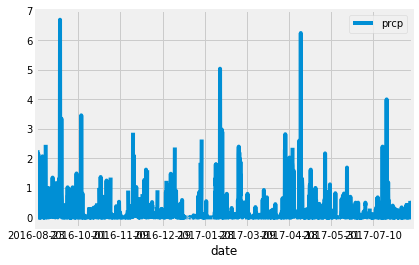

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

l12m_qry = session.query(Measurement.date, Measurement.prcp).filter(and_(Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23')).statement
# convert query to dataframe
l12m_df = pd.read_sql(l12m_qry, session.bind)
# Calculate the date 1 year ago from the last data point in the database
#?????
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
dpr_df = pd.read_sql(l12m_qry, session.bind)


# Sort the dataframe by date

dpr_df = dpr_df.sort_values("date").set_index("date")
# Use Pandas Plotting with Matplotlib to plot the data
dpr_df.plot()


![precipitation](Images/precipitation.png)

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dpr_df.describe()

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

![describe](Images/describe.png)

In [22]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).distinct(Measurement.station).count()

9

In [23]:
# showing names of stations in measurement table
measure_df['station'].unique()

array(['USC00519397', 'USC00513117', 'USC00514830', 'USC00517948',
       'USC00518838', 'USC00519523', 'USC00519281', 'USC00511918',
       'USC00516128'], dtype=object)

In [24]:
# showing names of stations in stations table
station_df['name'].unique()

array(['WAIKIKI 717.2, HI US', 'KANEOHE 838.1, HI US',
       'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'PEARL CITY, HI US',
       'UPPER WAHIAWA 874.3, HI US', 'WAIMANALO EXPERIMENTAL FARM, HI US',
       'WAIHEE 837.5, HI US', 'HONOLULU OBSERVATORY 702.2, HI US',
       'MANOA LYON ARBO 785.2, HI US'], dtype=object)

In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [44]:
active_station = active_stations[0][0]
temp_qry = session.query(Measurement.tobs).filter(Measurement.station == active_station)
temp_df = pd.read_sql(temp_qry.statement, temp_qry.session.bind)
temp_df

tobs
0     70.0
1     62.0
2     74.0
3     75.0
4     74.0
...    ...
2767  77.0
2768  77.0
2769  76.0
2770  76.0
2771  79.0

[2772 rows x 1 columns]

In [46]:
# lowest temperature
temp_df["tobs"].min()

54.0

In [47]:
# highest temperature
temp_df["tobs"].max()

85.0

In [49]:
# average temperature
temp_df["tobs"].mean()

71.66378066378067

In [50]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempobs_qry = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station)
tempobs_df = pd.read_sql(tempobs_qry.statement, tempobs_qry.session.bind)
tempobs_df

station  count_1
0  USC00511918     1979
1  USC00513117     2709
2  USC00514830     2202
3  USC00516128     2612
4  USC00517948     1372
5  USC00518838      511
6  USC00519281     2772
7  USC00519397     2724
8  USC00519523     2669

![precipitation](Images/station-histogram.png)

In [56]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [63]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps_qry = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23').statement
calc_temps_df = pd.read_sql(calc_temps_qry, session.bind)
calc_temps_df


min_1      avg_1  max_1
0   58.0  74.590583   87.0

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
